# Algorithms for Classification

In [1]:
# batch_size : 한 번에 처리하는 데이터 수
# max_iter   : 이터레이션의 max_iter는 최대 수를 정의
# epoch      : 한 번의 시뮬레이션이 완료 (1세기)

# test_iter  : 실전에 사용할 iterator 의 수를 정의
# 출처: http://crmn.tistory.com/8 [크롬망간이 글 쓰는 공간]

## 1 Perceptron
'선형 활성함수' 학습 알고리즘 구현하기

<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_schematic.png" align='left' width='450'>

### 01 퍼셉트론 알고리즘 구현하기
선형회귀식 알고리즘

In [2]:
class Perceptron(object): 

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta         # eta (Learning rate) : float (0.0 ~ 0.1)
        self.n_iter = n_iter   # n_iter              : int (epoch 수)

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # w_ : fitting 후의 weight (1d-array)
        self.errors_ = []                   
        for _ in range(self.n_iter):        # X : {array-like}, shape = [n_samples, n_features]
            errors = 0                      # y : array-like, shape = [n_samples] 
            for xi, target in zip(X, y):   
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):                         # Calculate net input
        return np.dot(X, self.w_[1:]) + self.w_[0]  # np.dot 내적곱 계산

    def predict(self, X):   # Return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### 02 Import Data
iris Classification

In [3]:
# iris 데이터 불러오기
import numpy as np
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
set(df.iloc[:,4])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [5]:
# np.where()

# excel ) if(condition, true, false)
# python) np.where(arr>0,2,arr)  -> arr가 0보다 크면 2, 작으면 arr원래 값 
# python) np.where(cond1 & cond2, 0, np.where(cond1, 1, np.where(cond2, 2, 3)))
#         -> cond1과 cond2가 0보다 크면 0 cond1만 크면 1 cond2만 크면 2 다 작으면 3이 출력된다

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

X = df.iloc[0:100, [0, 2]].values        # sepal 길이 (0) , petal 길이 (2)

print(X.shape); X[:5]

(100, 2)


array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

In [7]:
y = df.iloc[0:100, 4].values             # iris 의 종류 (4) 
y = np.where(y == 'Iris-setosa', -1, 1)  # Iris-setosa 유무로 -1, 1을 표기한다

print(y.shape); y

(100,)


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 03 Describing Data 
by Scatter Map

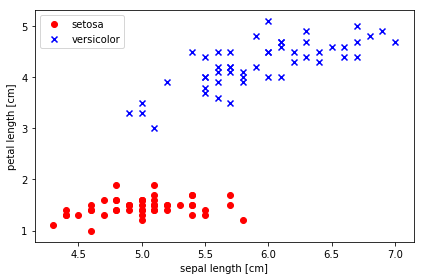

In [8]:
# ploting data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]'); plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')   ; plt.tight_layout()  ; plt.show()

### 04 Algorithm  적용하기
perceptron

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y) 
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

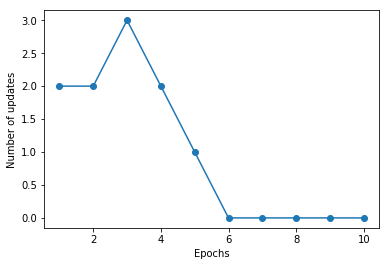

In [10]:
#         epoch 횟수를 순차적 적용            오차값
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### 05 2차원 경계를 구체적 시각화하기
perceptron

In [11]:
# https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/ 
# x축 벡터, y축 벡터값 = np.meshgrid (x축 데이터 list , y축 데이터 list)  

In [12]:
# 구별 영역을 5가지 유형으로 다르게 표현한다.
def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')  # marker 의 유형을 미리 정의하기
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # x축 벡터, y축 벡터값 =   np.meshgrid (x축 데이터 list , y축 데이터 list)  
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())  ; plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,  c=cmap(idx),  edgecolor='black',
                    marker=markers[idx],      label=cl)

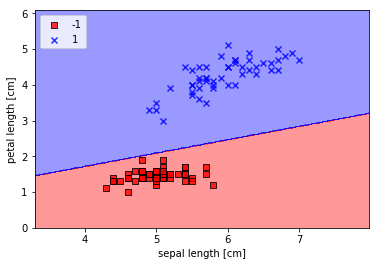

In [13]:
from matplotlib.colors import ListedColormap
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 2 ADAptive Linear Neuron classifier
Cost/ Loss 함수를 정의 후 최소화를 주요개념 (weight 값 조절시 1단계를 추가)

Logistic, SVM 의 기본이론 - Gradiend Descent (각 weight의 편도함수로 계산)

<img src="https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png" align='left' width='450'>

In [14]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta                       # eta : float (Learning rate)
        self.n_iter = n_iter                 # n_iter : int (batch)
    
    def fit(self, X, y):                     # Adline 의 가장 많이 바뀌는 부분 : Gradient Descent를 적용
        self.w_ = np.zeros(1 + X.shape[1])   # w_ : weight 값 (1d-array)
        self.cost_ = []                      # cost_ : list (epoch 별 cost 값을 list로 정리)

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)   # Gradient Descent 를 적용한 Cost 함수
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):      # Calculate net input
        return np.dot(X, self.w_[1:]) + self.w_[0]     

    def activation(self, X):     # Compute linear activation
        return self.net_input(X)

    def predict(self, X):        # Return class label after unit step
        return np.where(self.activation(X) >= 0.0, 1, -1)

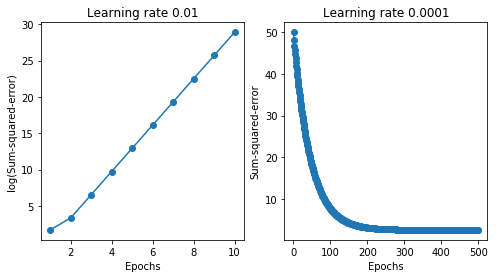

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs');  ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Learning rate 0.01')

ada2 = AdalineGD(n_iter=500, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs');  ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Learning rate 0.0001')
plt.show()

In [16]:
# learning rate 의 적정값 찾기

# learning rate 를  0.01로 하면 epoch 이 증가할 수록 cost가 증가
# learning rate 를 0.0001로 하면 300번 이상해야 수렴 (단 이떄 overfiting이 가능)

# cost 가 증가 < learning rate 적정값  < cost 가 너무 적게감소 (비효율적)

In [17]:
# Data를 재조정

# 01 Normalization (Andrew Ang)
# 수식 : (요소값 - 최소값) / (최대값 - 최소값)
# 설명 : 전체 구간을 0~100으로 설정하여 데이터를 관찰하는 방법으로, 특정 데이터의 위치를 확인할 수 있게 해줌

# 02 Standardization (김석훈)
# 수식 : (요소값 - 평균) / 표준편차
# 설명 : 평균까지의 거리로, 2개 이상의 대상이 단위가 다를 때, 대상 데이터를 같은 기준으로 볼 수 있게 해줌
# 출처: http://pythonkim.tistory.com/23 [파이쿵]

In [18]:
# Standardize Features 를 적용

# Feature Scaling : Learning Rate 에 따른 변화가 너무 달라서
#                   데이터의 scaling 을  평균 : 0 , 표준편차 : 1인 값들로 변환해서
#                   Learning Rate 가 0.01에도 학습이 이루어 지도록 데이터를 재조절

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

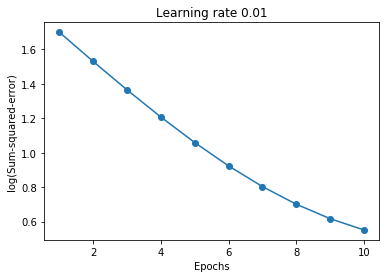

In [19]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X_std, y)
plt.plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
plt.xlabel('Epochs');  
plt.ylabel('log(Sum-squared-error)')
plt.title('Learning rate 0.01')
plt.show()

## 3 확률적 Gradient Descent
1. Data 의 변화률을 통해서 weight를 계산한다
2. 크기가 작고 업데이트가 더 빈번하게 이루어져서, 훨씬 더 빨리 수렴값을 계산가능
3. 초기값을 변화하지 않도록 조절하여, 실시간 데이터 처리도 유용하도록 한다.

<img src="https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png" align='left' width='450'>

In [20]:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta    : float, Learning rate (between 0.0 and 1.0)
    n_iter : int, Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array, Weights after fitting.
    cost_ : list, Sum-of-squares cost function value averaged over all training samples in each epoch.
    shuffle : bool (default: True), Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights."""

'ADAptive LInear NEuron classifier.\n\nParameters\n------------\neta    : float, Learning rate (between 0.0 and 1.0)\nn_iter : int, Passes over the training dataset.\n\nAttributes\n-----------\nw_ : 1d-array, Weights after fitting.\ncost_ : list, Sum-of-squares cost function value averaged over all training samples in each epoch.\nshuffle : bool (default: True), Shuffles training data every epoch if True to prevent cycles.\nrandom_state : int (default: None)\n    Set random state for shuffling and initializing the weights.'

In [21]:
# class 선언시 매개변수들을 정의 
# (self - class 명을 지정할 떄 동일성을 유지하기 위해서)

In [22]:
class AdalineSGD(object):

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta;              self.n_iter = n_iter
        self.w_initialized = False;  self.shuffle = shuffle
        if random_state: seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle: X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):     # weight 값을 초기화 하지 않도록 한다.
        if not self.w_initialized:
            self._initialize_weights(X.shape[1]) # 
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):   # Shuffle training data
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):       # Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):  # Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):                # Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [23]:
from numpy.random import seed

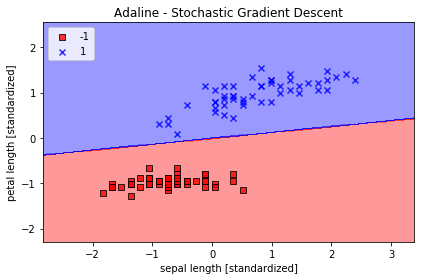

In [25]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

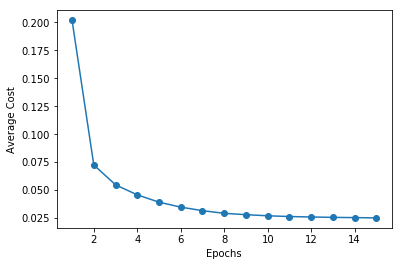

In [27]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()